<a href="https://colab.research.google.com/github/rbbh/ARIMA-SVR-PSO-ensemble/blob/master/30_Experiments_of_ARIMA_%2B_(SVR_%2B_PSO)_Val_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from google.colab import files

In [0]:
import io
import pandas as pd

In [29]:
uploaded = files.upload()   

Saving lakeerie.txt to lakeerie.txt


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['lakeerie.txt']))

In [31]:
uploaded = files.upload()

Saving lakeerie_ARIMA.txt to lakeerie_ARIMA.txt


In [0]:
data_ARIMA = pd.read_csv(io.BytesIO(uploaded['lakeerie_ARIMA.txt']))

In [33]:
uploaded = files.upload()

Saving lakeerie_r.txt to lakeerie_r.txt


In [0]:
data_r = pd.read_csv(io.BytesIO(uploaded['lakeerie_r.txt']))

In [35]:
data_r.describe()

,Residuo
count,$600.00
mean,$0.01
std,$0.47
min,$-1.86
25%,$-0.27
50%,$-0.05
75%,$0.24
max,$3.02


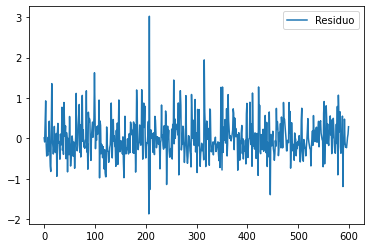

In [36]:
data_r.plot()

In [37]:
len(data)

600

In [0]:
#Scaling the data
from sklearn import preprocessing

data_r_n = data_r.copy()

data_r_n = (data_r - data_r.min())/(data_r.max() - data_r.min())

data_r_n = pd.DataFrame(data_r_n)



In [39]:
# TODO: Create function for the Lag used for the prediction
# We will use 12 for the lag dimension if the series repeats 
# itself annually, 3 if it is trimestrial etc.

# Note: For the "ONS" data base, make "dimensions" = 3
# NOTE: For the "Milk" data base, make "dimensions" = 24

dimensions = 12
data_cn = pd.concat([data_r_n.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_cn)

     Residuo  Residuo  Residuo  Residuo  ...  Residuo  Residuo  Residuo  Residuo
0      $0.38     $nan     $nan     $nan  ...     $nan     $nan     $nan     $nan
1      $0.36    $0.38     $nan     $nan  ...     $nan     $nan     $nan     $nan
2      $0.47    $0.36    $0.38     $nan  ...     $nan     $nan     $nan     $nan
3      $0.57    $0.47    $0.36    $0.38  ...     $nan     $nan     $nan     $nan
4      $0.35    $0.57    $0.47    $0.36  ...     $nan     $nan     $nan     $nan
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
595    $0.34    $0.34    $0.34    $0.37  ...    $0.41    $0.35    $0.31    $0.34
596    $0.36    $0.34    $0.34    $0.34  ...    $0.49    $0.41    $0.35    $0.31
597    $0.39    $0.36    $0.34    $0.34  ...    $0.14    $0.49    $0.41    $0.35
598    $0.40    $0.39    $0.36    $0.34  ...    $0.38    $0.14    $0.49    $0.41
599    $0.44    $0.40    $0.39    $0.36  ...    $0.35    $0.38    $0.14    $0.49

[600 rows x 13 columns]


In [40]:
# Splitting the residual data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cn.iloc[12:,1:]

y = data_cn.iloc[12:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3129, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.4347, shuffle = False)


print(len(y_val))
print(len(y_test))
print(len(y_train))


104
80
404


In [41]:
dimensions = 12
data_c2n = pd.concat([data_ARIMA.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c2n)

     ARIMA  ARIMA  ARIMA  ARIMA  ARIMA  ...  ARIMA  ARIMA  ARIMA  ARIMA  ARIMA
0   $14.75   $nan   $nan   $nan   $nan  ...   $nan   $nan   $nan   $nan   $nan
1   $14.74 $14.75   $nan   $nan   $nan  ...   $nan   $nan   $nan   $nan   $nan
2   $14.65 $14.74 $14.75   $nan   $nan  ...   $nan   $nan   $nan   $nan   $nan
3   $15.45 $14.65 $14.74 $14.75   $nan  ...   $nan   $nan   $nan   $nan   $nan
4   $17.08 $15.45 $14.65 $14.74 $14.75  ...   $nan   $nan   $nan   $nan   $nan
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
595 $17.80 $18.04 $18.06 $17.62 $16.54  ... $16.28 $16.51 $17.35 $18.58 $19.41
596 $17.19 $17.80 $18.04 $18.06 $17.62  ... $16.96 $16.28 $16.51 $17.35 $18.58
597 $16.63 $17.19 $17.80 $18.04 $18.06  ... $15.73 $16.96 $16.28 $16.51 $17.35
598 $16.33 $16.63 $17.19 $17.80 $18.04  ... $16.15 $15.73 $16.96 $16.28 $16.51
599 $16.29 $16.33 $16.63 $17.19 $17.80  ... $16.54 $16.15 $15.73 $16.96 $16.28

[600 rows x 13 columns]


In [42]:
# Splitting the ARIMA predictions into train, validation and test

from sklearn.model_selection import train_test_split

X_ARIMA = data_c2n.iloc[12:,1:]

y_ARIMA = data_c2n.iloc[12:,0]

X_train_ARIMA, X_val_ARIMA, y_train_ARIMA, y_val_ARIMA = train_test_split(X_ARIMA, y_ARIMA, test_size = 0.3129, shuffle = False)

X_val_ARIMA, X_test_ARIMA, y_val_ARIMA, y_test_ARIMA = train_test_split(X_val_ARIMA, y_val_ARIMA, test_size = 0.4347, shuffle = False)

print(len(y_val_ARIMA))
print(len(y_test_ARIMA))
print(len(y_train_ARIMA))

104
80
404


In [43]:
dimensions = 12
data_c3n = pd.concat([data.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c3n)

         X      X      X      X      X  ...      X      X      X      X      X
0   $14.76   $nan   $nan   $nan   $nan  ...   $nan   $nan   $nan   $nan   $nan
1   $14.65 $14.76   $nan   $nan   $nan  ...   $nan   $nan   $nan   $nan   $nan
2   $15.09 $14.65 $14.76   $nan   $nan  ...   $nan   $nan   $nan   $nan   $nan
3   $16.38 $15.09 $14.65 $14.76   $nan  ...   $nan   $nan   $nan   $nan   $nan
4   $16.93 $16.38 $15.09 $14.65 $14.76  ...   $nan   $nan   $nan   $nan   $nan
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
595 $17.57 $17.86 $17.84 $17.55 $17.02  ... $16.83 $16.66 $17.21 $18.22 $19.20
596 $17.08 $17.57 $17.86 $17.84 $17.55  ... $15.77 $16.83 $16.66 $17.21 $18.22
597 $16.66 $17.08 $17.57 $17.86 $17.84  ... $15.73 $15.77 $16.83 $16.66 $17.21
598 $16.43 $16.66 $17.08 $17.57 $17.86  ... $16.00 $15.73 $15.77 $16.83 $16.66
599 $16.58 $16.43 $16.66 $17.08 $17.57  ... $17.02 $16.00 $15.73 $15.77 $16.83

[600 rows x 13 columns]


In [18]:
# Splitting the raw data into train, validation and test

from sklearn.model_selection import train_test_split

X_raw = data_c3n.iloc[12:,1:]

y_raw = data_c3n.iloc[12:,0]

X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_raw, y_raw, test_size = 0.3129, shuffle = False)

X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(X_val_raw, y_val_raw, test_size = 0.4347, shuffle = False)

print(len(y_val_raw))
print(len(y_test_raw))
print(len(y_train_raw))

78
96
300


In [0]:
def pso(n_particles, iterations, dimensions, inertia, k_best_particles, experiments):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    

    # Initializing regression variables    
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    # Initializing variables for experiment collection
    g_bests = []
    g_bests_RGS_experiment = []
    mse_residuals = []
    final_experiment_predictions = []

    last_configurations = []
    
    average_particles = []
    mse_averages = []
    final_experiment_averages = []

    median_particles = []
    mse_medians = []
    final_experiment_medians = []

    average_k_best_predictions = []
    mse_averages_k_best = []
    final_experiment_k_averages = []

    median_k_best_predictions = []
    mse_medians_k_best = []
    final_experiment_k_medians = []
    
    mse_ARIMA = []
    mse_ensemble = []


    from sklearn.metrics import mean_squared_error

    for e in range(experiments):
      
        # Initializing particles' positions randomly, inside
        # the search space
        x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
        y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
        z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

        c = np.concatenate((x,y,z), axis=1)

        if(e == 0):
            # Displaying tridimensional search space
            plot(c)

        # Initializing particles' parameters
        v = np.zeros((n_particles, dimensions))
        c1 = 2
        c2 = 2
        p_best = np.zeros((n_particles, dimensions))
        p_best_val = np.zeros(n_particles) + sys.maxsize  
        g_best = np.zeros(dimensions)
        g_best_val = sys.maxsize

        best_iter = np.zeros(iterations)

        for i in range(iterations):

            for j in range(n_particles):
              
                # Starting Regression
                rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

                # Fitting the curve
                rgs.fit(X_train, y_train)
                y_predict = rgs.predict(X_val)

                # Using Mean Squared Error to verify prediction accuracy
                mse = mean_squared_error(y_val, y_predict) 

                # If mse value for that search point, for that particle,
                # is less than its personal best point,
                # replace personal best
                if(mse < p_best_val[j]):   
                    # The value below represents the current least Mean Squared Error
                    p_best_val[j] = mse
                    
                    # The value below represents the current least Regressor
                    p_best_RGS[j] = rgs
                                

                    # The value below represents the current search coordinates for
                    # the particle's current least Mean Squared Error found
                    p_best[j] = c[j].copy()
                    
                # Using auxiliar variable to get the index of the
                # particle that found the configuration with the 
                # minimum MSE value
                aux = np.argmin(p_best_val)        
              
                if(p_best_val[aux] < g_best_val):
                    # Assigning Particle's current best MSE to the Group's best    
                    g_best_val = p_best_val[aux]

                    # Assigning Particle's current best configuration to the Group's best
                    g_best = p_best[aux].copy()

                    # Group best regressor:
                    # the combination of C, Epsilon and Gamma
                    # that computes the best fitting curve
                    g_best_RGS = p_best_RGS[aux]

              
                rand1 = np.random.random()
                rand2 = np.random.random()

                # The variable below influences directly the particle's velocity.
                # It can either make it smaller or bigger. 
                w = inertia

                # The equation below represents Particle's velocity, which is
                # the rate of change in its position
                v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

                # Change in the Particle's position 
                c[j] = c[j] + v[j]

                # Below is a series of conditions that stop the particles from
                # leaving the search space
                if(c[j][2] < min_g):
                  c[j][2] = min_g
                if(c[j][2] > max_g):
                  c[j][2] = max_g
                if(c[j][1] < min_e):
                  c[j][1] = min_e
                if(c[j][1] > max_e):
                  c[j][1] = max_e
                if(c[j][0] < min_c):
                  c[j][0] = min_c
                if(c[j][0] > max_c):
                  c[j][0] = max_c
                
        
        # Storing last particles` positions
        # for later use
        last_configurations.append(c)

        # Making the prediction with the best configuration of C, Epsilon and
        # Gamma found by the particles
        predict_test = g_best_RGS.predict(X_val)

        g_bests_RGS_experiment.append(g_best_RGS)
        g_bests.append(g_best)

        mse_r = mean_squared_error(y_val, predict_test)
        mse_residuals.append(mse_r)

    
        # Taking all particles' final predictions,
        # getting their averages and medians and
        # getting the k best subset of particles
        # to see the final prediction without outliers
        k = k_best_particles
        average_p, median_p, av_k_best_p, md_k_best_p = particles_last_predictions(c, n_particles, k)

        average_particles.append(average_p)
        median_particles.append(median_p)
        average_k_best_predictions.append(av_k_best_p)
        median_k_best_predictions.append(md_k_best_p)
        
        mse_e, mse_AR = residual_performance(predict_test, y_val_ARIMA, y_val_raw)

        # Storing the Ensemble's (final system) mse
        mse_ARIMA.append(mse_AR)
        mse_ensemble.append(mse_e)

        # Storing the mse of the average predictions
        mse_A, mse_AR = residual_performance(average_p, y_val_ARIMA, y_val_raw)
        mse_averages.append(mse_A)

        # Storing the mse of the average k best predictions
        mse_A_k_best, mse_AR = residual_performance(av_k_best_p, y_val_ARIMA, y_val_raw)
        mse_averages_k_best.append(mse_A_k_best)

        # Storing the mse of the median predictions
        mse_M, mse_AR = residual_performance(median_p, y_val_ARIMA, y_val_raw)
        mse_medians.append(mse_M)

        # Storing the mse of the median k best predictions
        mse_M_k_best, mse_AR = residual_performance(md_k_best_p, y_val_ARIMA, y_val_raw)
        mse_medians_k_best.append(mse_M_k_best)

        # Getting the final results of the current experiment
        # and storing them
        final_exp_p, final_exp_av, final_exp_md, final_exp_av_k, final_exp_md_k = results(g_best_RGS, average_p, median_p, av_k_best_p, md_k_best_p)

        final_exp_p = final_exp_p.tolist()
        final_exp_av = final_exp_av.tolist()
        final_exp_md = final_exp_md.tolist()
        final_exp_av_k = final_exp_av_k.tolist()
        final_exp_md_k = final_exp_md_k.tolist()

        final_experiment_predictions.append(final_exp_p)
        final_experiment_averages.append(final_exp_av)
        final_experiment_medians.append(final_exp_md)
        final_experiment_k_averages.append(final_exp_av_k)
        final_experiment_k_medians.append(final_exp_md_k)

        print('\nExperiment # %d: done. MSE_g_Best: %f; MSE_AV: %f; MSE_MD: %f; MSE_k_AV: %f; MSE_k_MD: %f\n'%(e+1, mse_e, mse_A, mse_M, mse_A_k_best, mse_M_k_best)) 


    aux_result_1 = np.argmin(mse_ensemble)
    mse_final = mse_ensemble[aux_result_1]

    #print('Debug 1')

    aux_result_2 = np.argmin(mse_residuals)
    best_regression = g_bests_RGS_experiment[aux_result_2]
    best_configuration = g_bests[aux_result_2]

    c = last_configurations[aux_result_2]

    probable_best_predictions = final_experiment_predictions[aux_result_2]

    corresponding_average = final_experiment_averages[aux_result_2]
    corresponding_median = final_experiment_medians[aux_result_2]

    corresponding_k_average = final_experiment_k_averages[aux_result_2]
    corresponding_k_median = final_experiment_k_medians[aux_result_2]

    #print('Debug 2')

    display_results(best_regression, probable_best_predictions, 
                    corresponding_average, corresponding_median,
                    corresponding_k_average, corresponding_k_median,c)

    #print('Debug 3')

    #final_experiment_predictions_T = list(map(list, zip(*final_experiment_predictions)))
    #final_experiment_averages_T = list(map(list, zip(*final_experiment_averages)))
    #final_experiment_medians_T = list(map(list, zip(*final_experiment_medians)))
    #final_experiment_k_averages_T = list(map(list, zip(*final_experiment_k_averages)))
    #final_experiment_k_medians_T = list(map(list, zip(*final_experiment_k_medians)))

    final_experiment_predictions_concat = [item for sublist in final_experiment_predictions for item in sublist] 
    final_experiment_averages_concat = [item for sublist in final_experiment_averages for item in sublist]
    final_experiment_medians_concat = [item for sublist in final_experiment_medians for item in sublist]
    final_experiment_k_averages_concat = [item for sublist in final_experiment_k_averages for item in sublist]
    final_experiment_k_medians_concat = [item for sublist in final_experiment_k_medians for item in sublist]


    print(color.BOLD + '\nBest Result: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1+1, mse_final) + color.BOLD )  


    pd.options.display.float_format = '${:,.2f}'.format
    final_results = pd.DataFrame()

    
    final_results["Previsoes com o G_Best (Sistema Final)"] = final_experiment_predictions_concat
    final_results["Previsoes com as Medias"] = final_experiment_averages_concat
    final_results["Previsoes com as Medianas"] = final_experiment_medians_concat
    final_results["Previsoes com a Media das K melhores particulas"] = final_experiment_k_averages_concat
    final_results["Previsoes com a Mediana das K melhores particulas"] = final_experiment_k_medians_concat
    
    final_mse = pd.DataFrame()
    
    final_mse["Melhores Configuracoes (G_Bests)"] = g_bests
    final_mse["MSE da Previsao do Sistema Final"] = mse_ensemble
    final_mse["MSE da Previsao das Medias"] = mse_averages
    final_mse["MSE da Previsao das Medianas"] = mse_medians
    final_mse["MSE da Previsao das Medias das K melhores particulas"] = mse_averages_k_best
    final_mse["MSE da Previsao das Medianas das K melhores particulas"] = mse_medians_k_best
    final_mse["MSE da Previsao do ARIMA"] = mse_ARIMA


    final_results.to_csv("Val_Electric_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_mse.to_csv("Val_MSE_Electric_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

In [0]:
def display_results(configuration, final_predictions, 
                    final_predictions_average, final_predictions_median, 
                    final_predictions_k_average, final_predictions_k_median, all_particles):

    from sklearn.metrics import mean_squared_error
    
    data = y_val_raw
    ARIMA = y_val_ARIMA

    plot(all_particles)

    mse_ARIMA = mean_squared_error(ARIMA, data)
    mse = mean_squared_error(final_predictions, data)
    mse_A = mean_squared_error(final_predictions_average, data)
    mse_M = mean_squared_error(final_predictions_median, data)
    mse_k_A = mean_squared_error(final_predictions_k_average, data)
    mse_k_M = mean_squared_error(final_predictions_k_median, data)

    print('\nMean Squared Error for the ARIMA Model:\t %f' %mse_ARIMA)
    print('\nBest Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse)
    print('\nMean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_A)
    print('\nMean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_A)   
    print('\nMean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_M)
    print('\nMean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_M)


    print('\nBest Configuration Found:\n')
    print(configuration)

    print('\n')
    print('\n')
    print(color.BOLD + '\nARIMA Model series` predicitions:\n' + color.BOLD)

    plot_results(ARIMA)  


    print(color.BOLD + '\nEnsemble Model series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions)


    print(color.BOLD + '\nEnsemble Model best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_average)

    
    print(color.BOLD + '\nEnsemble Model K best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_average)


    print(color.BOLD + '\nEnsemble Model best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_median)

    
    print(color.BOLD + '\nEnsemble Model K best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_median)

    print('\n')
    print('\n')

In [0]:
def results(regression, average, median, k_average, k_median):
    
    import numpy as np

    data = y_val_raw
    ARIMA = y_val_ARIMA
    ARIMA = ARIMA.to_list()
    test = X_val

    average_residuals = average
    median_residuals = median

    k_average_residuals = k_average
    k_median_residuals = k_median
    #print('Debug Inside 1')

    #print(regression)
    
    tmp = regression.predict(test)
    #print('Debug Inside 2')


    residuals = tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A = average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M = median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A_k = k_average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M_k = k_median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

    final_predictions = ARIMA + residuals
    final_predictions_average = ARIMA + residuals_A
    final_predictions_median = ARIMA + residuals_M
    final_predictions_average_k = ARIMA + residuals_A_k
    final_predictions_median_k = ARIMA + residuals_M_k
    #print('Debug Inside 3')

    
    return final_predictions, final_predictions_average, final_predictions_median, final_predictions_average_k, final_predictions_median_k


In [0]:
def residual_performance(residual_predictions, ARIMA_predictions, raw_data):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st


    r_tmp = residual_predictions
    ARIMA = ARIMA_predictions
    data = raw_data

    # Un-scalling the residuals
    
    r = r_tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

        
    final_predictions = r + ARIMA
  

    mse1 = mean_squared_error(final_predictions, data)

    mse2 = mean_squared_error(ARIMA, data)
    

    return mse1, mse2

In [0]:
def particles_last_predictions(configurations, particles, k):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st
    
    predictions = []
    mse = []

    for p in range(particles):

        rgs = svm.SVR(C = configurations[p][0], epsilon = configurations[p][1], gamma = configurations[p][2])

        rgs.fit(X_train, y_train) 
        y_predict = rgs.predict(X_val) 

        mse.append(mean_squared_error(y_predict, y_val))
        predictions.append(y_predict)
    
    #print('Debug inside 1')

    total = [sum(x) for x in zip(*predictions)]
    #print('Debug inside 2')  
    
    average = [num/particles for num in total]
    #print('Debug inside 3')

    median = [st.median(num) for num in zip(*predictions)]

    predictions = np.array(predictions)
    id_k = np.argpartition(mse, k)
    k_best_pred = predictions[id_k[:k]]

    k_total = [sum(x) for x in zip(*k_best_pred)]

    av_k_best_pred = [num/k for num in k_total]

    md_k_best_pred = [st.median(num) for num in zip(*k_best_pred)]
    #print('Debug inside 5')


    return average, median, av_k_best_pred, md_k_best_pred

In [0]:
def plot_results(predictions):

    plt.plot(range(len(y_val_raw)), y_val_raw, label='Real')
    plt.plot(range(len(predictions)), predictions, label='Predicted')
    plt.legend()
    plt.show()

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



In [0]:
# Function that displays tridimensional plot
def plot(some_list):
 
    ax = Axes3D(plt.figure())
    ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'b')
    ax.set_xlabel('$C$', fontsize = 20)
    ax.set_ylabel('$\epsilon$', fontsize = 25)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
    ax.zaxis._axinfo['label']['space_factor'] = 1.0
    plt.show()

    print('\n')
    print('\n')

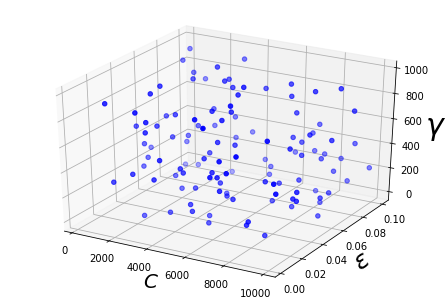






Experiment # 1: done. MSE_g_Best: 78968645.804633; MSE_AV: 79687444.272590; MSE_MD: 79639235.283686; MSE_k_AV: 78934874.897875; MSE_k_MD: 79069152.421973


Experiment # 2: done. MSE_g_Best: 79006061.310120; MSE_AV: 79579950.466766; MSE_MD: 79411863.194735; MSE_k_AV: 78944108.697977; MSE_k_MD: 79377822.936860


Experiment # 3: done. MSE_g_Best: 78985699.268709; MSE_AV: 79727541.190495; MSE_MD: 79645238.672769; MSE_k_AV: 78882632.959560; MSE_k_MD: 79078342.097631


Experiment # 4: done. MSE_g_Best: 78980692.347394; MSE_AV: 79476660.338931; MSE_MD: 79256851.164001; MSE_k_AV: 78797383.568159; MSE_k_MD: 79225633.617415


Experiment # 5: done. MSE_g_Best: 78999434.001579; MSE_AV: 79608384.604983; MSE_MD: 79844332.019742; MSE_k_AV: 78553283.652220; MSE_k_MD: 78958887.929534



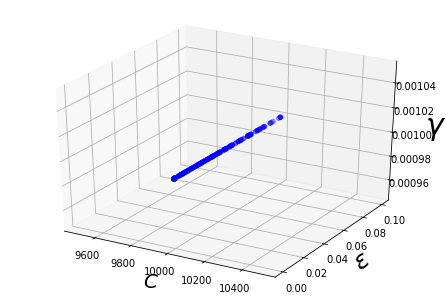






Mean Squared Error for the ARIMA Model:	 250179847.984915

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 78968645.804633

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79687444.272590

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 78934874.897875

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79639235.283686

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79069152.421973

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.03833366628206801,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



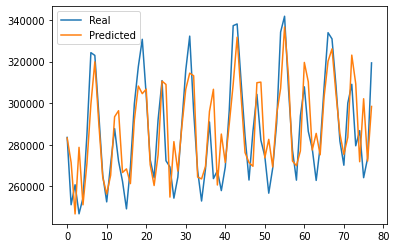


Ensemble Model series` predicitions:



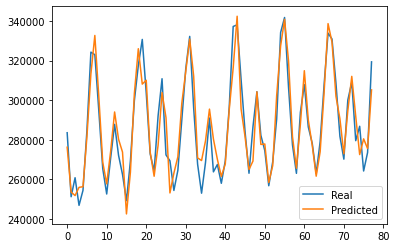


Ensemble Model best Average series` predicitions:



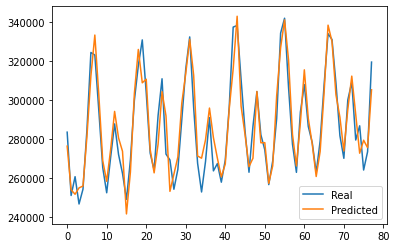


Ensemble Model K best Average series` predicitions:



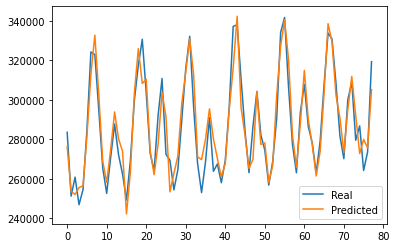


Ensemble Model best Median series` predicitions:



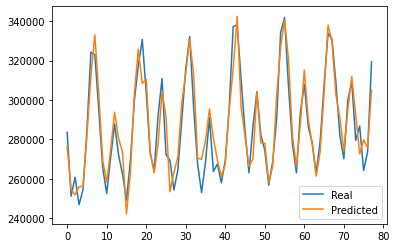


Ensemble Model K best Median series` predicitions:



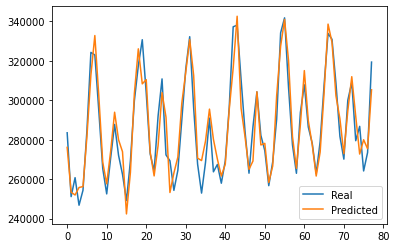






Best Result: Experiment # 1 . Mean Squared Error = 78968645.804633



In [136]:
pso(120, 100, 3, 1, 5, 5)

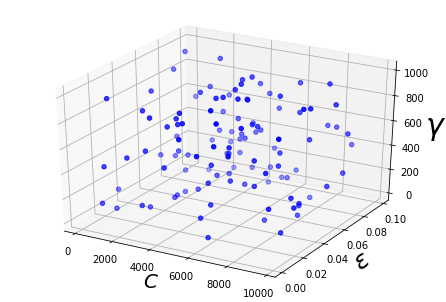






Experiment # 1: done. MSE_g_Best: 78918734.448378; MSE_AV: 79565358.060345; MSE_MD: 79395251.129913; MSE_k_AV: 78762402.662924; MSE_k_MD: 79047712.580644


Experiment # 2: done. MSE_g_Best: 78948366.508777; MSE_AV: 79521596.664846; MSE_MD: 79202945.944235; MSE_k_AV: 78948621.955743; MSE_k_MD: 79138690.527017


Experiment # 3: done. MSE_g_Best: 79002631.635513; MSE_AV: 79542350.957786; MSE_MD: 79390127.695188; MSE_k_AV: 78742754.187575; MSE_k_MD: 78473897.411877


Experiment # 4: done. MSE_g_Best: 78996761.679085; MSE_AV: 79562829.444864; MSE_MD: 79440879.764902; MSE_k_AV: 79085622.485954; MSE_k_MD: 79286355.606172


Experiment # 5: done. MSE_g_Best: 78989247.791340; MSE_AV: 79711588.675440; MSE_MD: 79623853.512181; MSE_k_AV: 78918698.492275; MSE_k_MD: 79107381.538023



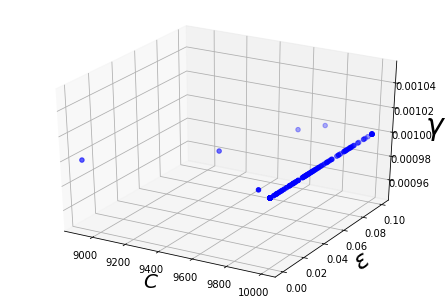






Mean Squared Error for the ARIMA Model:	 250179847.984915

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 78918734.448378

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79565358.060345

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 78762402.662924

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79395251.129913

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79047712.580644

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.037338864668810326, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



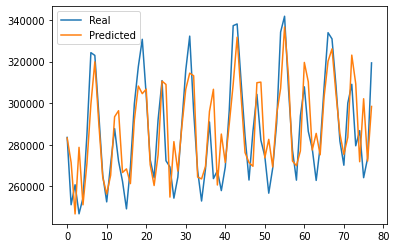


Ensemble Model series` predicitions:



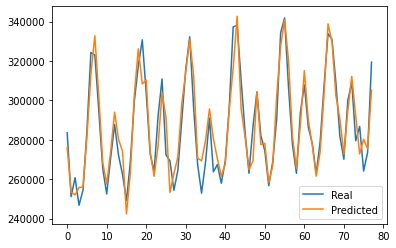


Ensemble Model best Average series` predicitions:



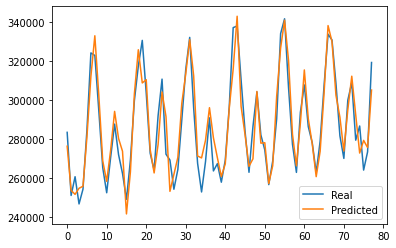


Ensemble Model K best Average series` predicitions:



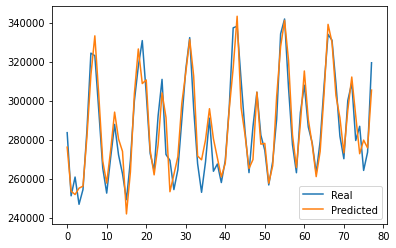


Ensemble Model best Median series` predicitions:



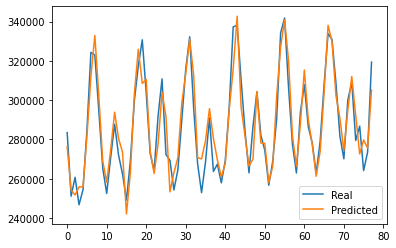


Ensemble Model K best Median series` predicitions:



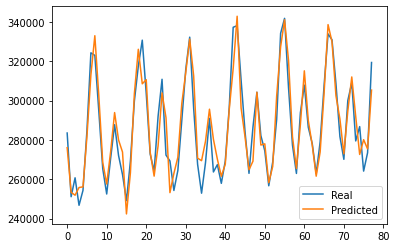






Best Result: Experiment # 1 . Mean Squared Error = 78918734.448378



In [137]:
pso(120, 100, 3, 1, 10, 5)

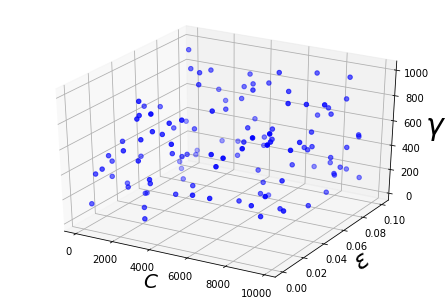






Experiment # 1: done. MSE_g_Best: 78978495.840547; MSE_AV: 79738914.300147; MSE_MD: 79772354.240366; MSE_k_AV: 79099604.358394; MSE_k_MD: 79343836.702743


Experiment # 2: done. MSE_g_Best: 79344971.774634; MSE_AV: 80014689.421419; MSE_MD: 79848606.195930; MSE_k_AV: 79546542.503136; MSE_k_MD: 79570182.980096


Experiment # 3: done. MSE_g_Best: 79032587.152835; MSE_AV: 79568501.735018; MSE_MD: 79308401.557106; MSE_k_AV: 78989247.734902; MSE_k_MD: 78669814.080866


Experiment # 4: done. MSE_g_Best: 78988939.415295; MSE_AV: 79723070.657301; MSE_MD: 79351579.346062; MSE_k_AV: 79090737.687926; MSE_k_MD: 79111569.656711


Experiment # 5: done. MSE_g_Best: 78983768.649354; MSE_AV: 79660644.210533; MSE_MD: 79296776.212100; MSE_k_AV: 79077514.889859; MSE_k_MD: 78791672.672104



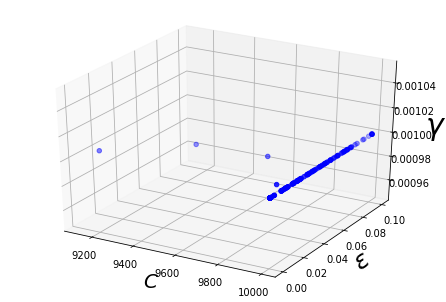






Mean Squared Error for the ARIMA Model:	 250179847.984915

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 78978495.840547

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79738914.300147

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79099604.358394

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79772354.240366

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79343836.702743

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.03740984951765408,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



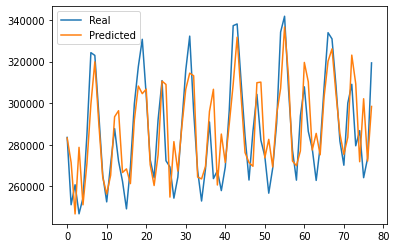


Ensemble Model series` predicitions:



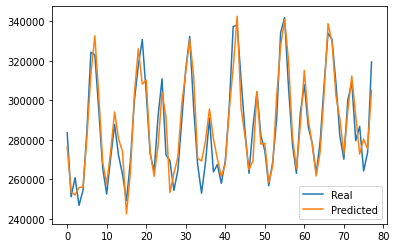


Ensemble Model best Average series` predicitions:



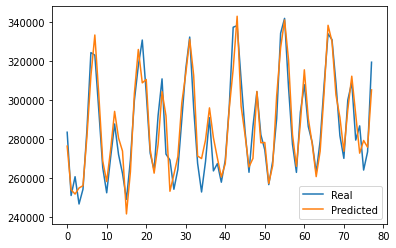


Ensemble Model K best Average series` predicitions:



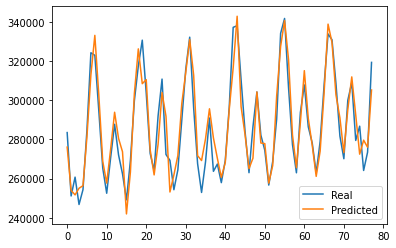


Ensemble Model best Median series` predicitions:



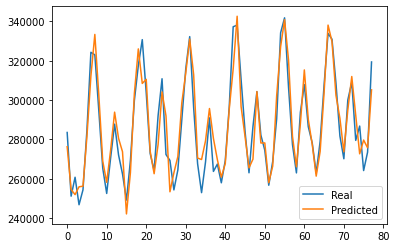


Ensemble Model K best Median series` predicitions:



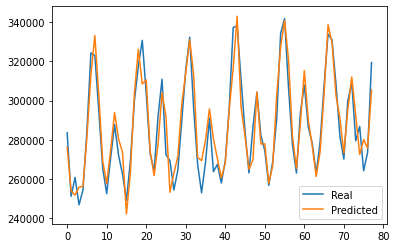






Best Result: Experiment # 1 . Mean Squared Error = 78978495.840547



In [138]:
pso(120, 100, 3, 1, 20, 5)

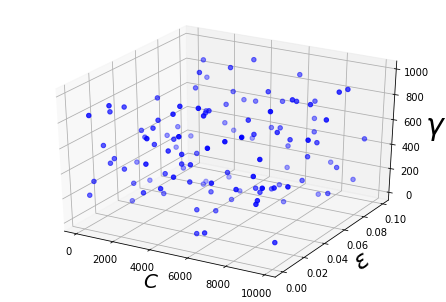






Experiment # 1: done. MSE_g_Best: 79010369.792817; MSE_AV: 79668304.377748; MSE_MD: 79586618.982974; MSE_k_AV: 79096933.700115; MSE_k_MD: 79175400.435038


Experiment # 2: done. MSE_g_Best: 79055785.627762; MSE_AV: 79580655.362953; MSE_MD: 79460303.290192; MSE_k_AV: 79184757.080190; MSE_k_MD: 79090647.339381


Experiment # 3: done. MSE_g_Best: 79009667.881242; MSE_AV: 79674918.920898; MSE_MD: 79689780.508332; MSE_k_AV: 78996330.452092; MSE_k_MD: 78977363.078287


Experiment # 4: done. MSE_g_Best: 77735108.762741; MSE_AV: 84019187.261063; MSE_MD: 79939882.795854; MSE_k_AV: 79034198.125671; MSE_k_MD: 78809078.284555


Experiment # 5: done. MSE_g_Best: 78989212.538612; MSE_AV: 79751674.355158; MSE_MD: 79477823.335758; MSE_k_AV: 79093949.729295; MSE_k_MD: 79122303.586404



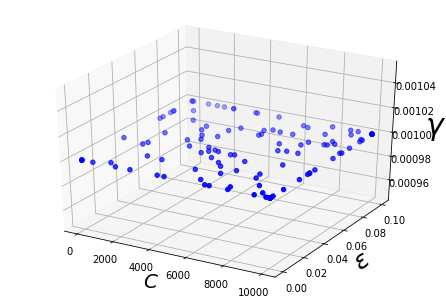






Mean Squared Error for the ARIMA Model:	 250179847.984915

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 77735108.762741

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 84019187.261063

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79034198.125671

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79939882.795854

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 78809078.284555

Best Configuration Found:

SVR(C=3468.3499866396733, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.04126233560664372, gamma=0.0160862857518147, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



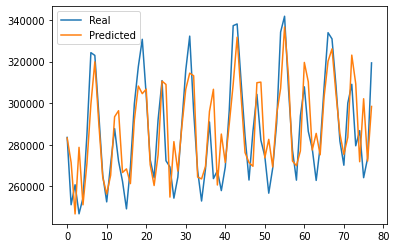


Ensemble Model series` predicitions:



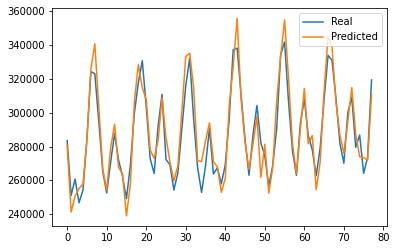


Ensemble Model best Average series` predicitions:



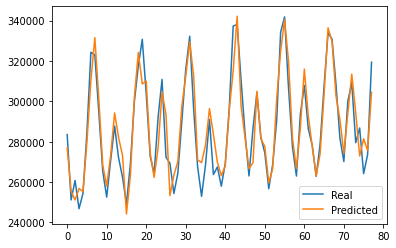


Ensemble Model K best Average series` predicitions:



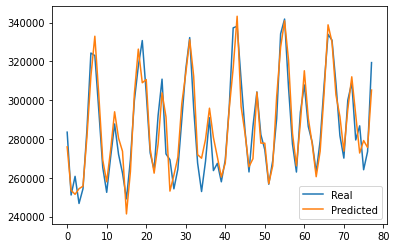


Ensemble Model best Median series` predicitions:



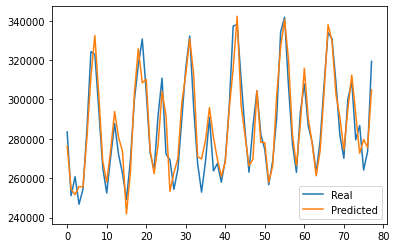


Ensemble Model K best Median series` predicitions:



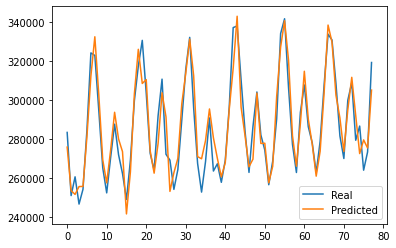






Best Result: Experiment # 4 . Mean Squared Error = 77735108.762741



In [139]:
pso(120, 100, 3, 1, 30, 5)

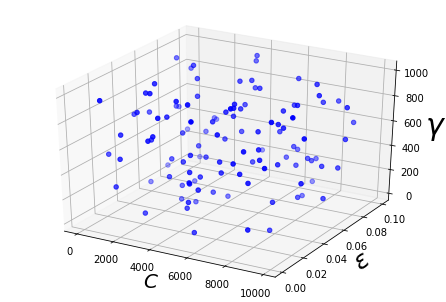






Experiment # 1: done. MSE_g_Best: 78978243.598511; MSE_AV: 79698366.456060; MSE_MD: 79430772.593708; MSE_k_AV: 79023454.827184; MSE_k_MD: 78865011.817400


Experiment # 2: done. MSE_g_Best: 79016742.146134; MSE_AV: 79551972.786416; MSE_MD: 79560645.210972; MSE_k_AV: 78892885.622282; MSE_k_MD: 78729721.921818


Experiment # 3: done. MSE_g_Best: 79026726.249322; MSE_AV: 79607003.986313; MSE_MD: 79504123.099278; MSE_k_AV: 78959263.519194; MSE_k_MD: 79191962.000656


Experiment # 4: done. MSE_g_Best: 79000023.003057; MSE_AV: 79733525.187490; MSE_MD: 79848177.607051; MSE_k_AV: 78953257.029629; MSE_k_MD: 79154443.160143


Experiment # 5: done. MSE_g_Best: 78972575.739243; MSE_AV: 79554424.187023; MSE_MD: 79361664.382469; MSE_k_AV: 78953242.232001; MSE_k_MD: 78864135.786914



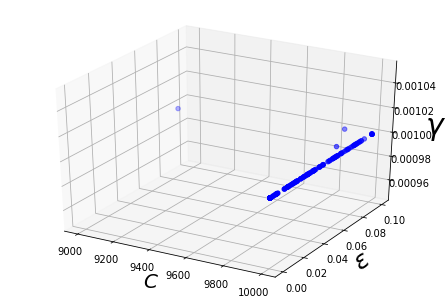






Mean Squared Error for the ARIMA Model:	 250179847.984915

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 78972575.739243

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79554424.187023

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 78953242.232001

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79361664.382469

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 78864135.786914

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.038333045869763493, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



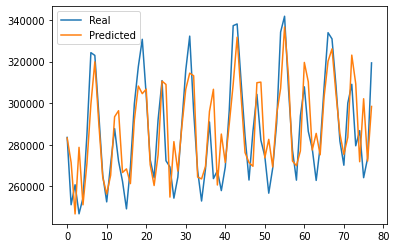


Ensemble Model series` predicitions:



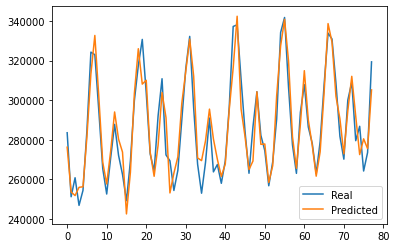


Ensemble Model best Average series` predicitions:



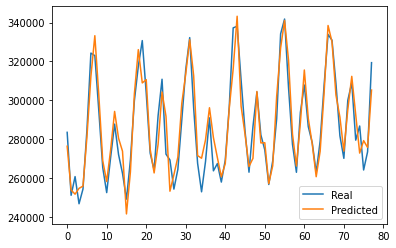


Ensemble Model K best Average series` predicitions:



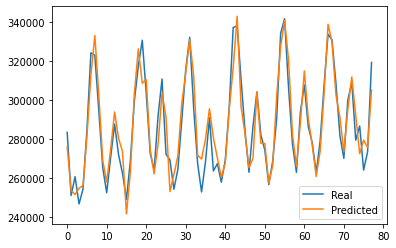


Ensemble Model best Median series` predicitions:



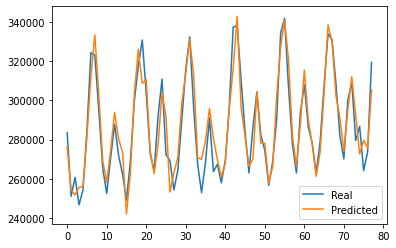


Ensemble Model K best Median series` predicitions:



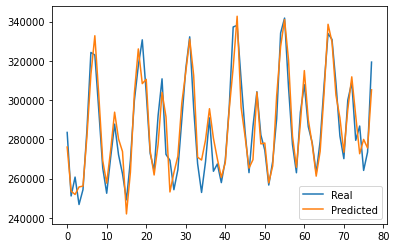






Best Result: Experiment # 5 . Mean Squared Error = 78972575.739243



In [140]:
pso(120, 100, 3, 1, 40, 5)

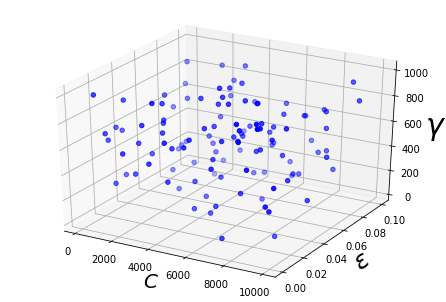






Experiment # 1: done. MSE_g_Best: 79016116.369775; MSE_AV: 79670692.065585; MSE_MD: 79497943.373773; MSE_k_AV: 79162360.225785; MSE_k_MD: 78864862.173927


Experiment # 2: done. MSE_g_Best: 79027598.313159; MSE_AV: 79826197.892049; MSE_MD: 79820247.583175; MSE_k_AV: 79167249.142145; MSE_k_MD: 79315509.785861


Experiment # 3: done. MSE_g_Best: 78995941.241359; MSE_AV: 79452312.782680; MSE_MD: 79336372.443794; MSE_k_AV: 79080730.997313; MSE_k_MD: 78939335.136276


Experiment # 4: done. MSE_g_Best: 78981380.333224; MSE_AV: 79734786.073070; MSE_MD: 79893367.735452; MSE_k_AV: 79165566.480806; MSE_k_MD: 79344820.188025


Experiment # 5: done. MSE_g_Best: 79350220.529446; MSE_AV: 80076663.022798; MSE_MD: 79828470.875359; MSE_k_AV: 79693633.167401; MSE_k_MD: 79717629.027126



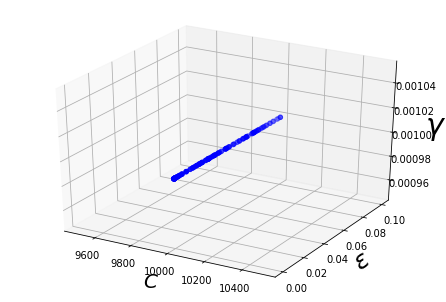






Mean Squared Error for the ARIMA Model:	 250179847.984915

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 78981380.333224

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79734786.073070

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79165566.480806

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79893367.735452

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79344820.188025

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.038363298684079665, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



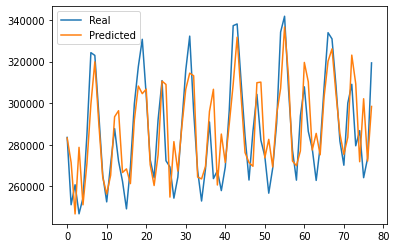


Ensemble Model series` predicitions:



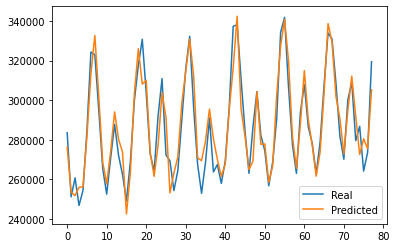


Ensemble Model best Average series` predicitions:



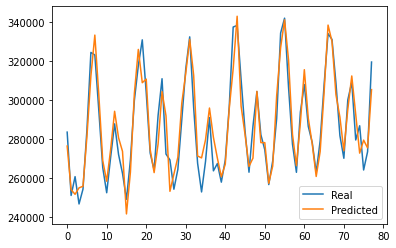


Ensemble Model K best Average series` predicitions:



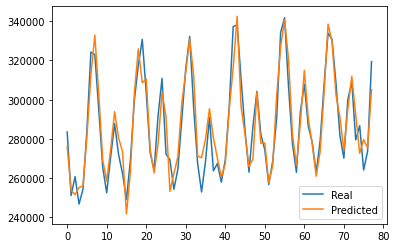


Ensemble Model best Median series` predicitions:



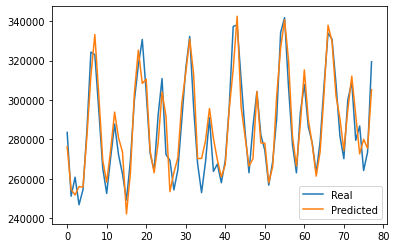


Ensemble Model K best Median series` predicitions:



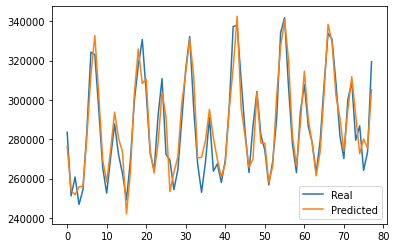






Best Result: Experiment # 4 . Mean Squared Error = 78981380.333224



In [27]:
pso(120, 100, 3, 1, 50, 5)

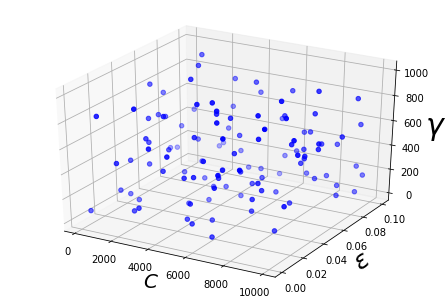






Experiment # 1: done. MSE_g_Best: 79355668.450761; MSE_AV: 79970414.791511; MSE_MD: 79707551.613170; MSE_k_AV: 79707779.074879; MSE_k_MD: 79671401.307868


Experiment # 2: done. MSE_g_Best: 79009072.265701; MSE_AV: 79441381.598894; MSE_MD: 79384834.589371; MSE_k_AV: 78976536.816308; MSE_k_MD: 78868502.049250


Experiment # 3: done. MSE_g_Best: 78997827.425109; MSE_AV: 79590876.485880; MSE_MD: 79391285.950318; MSE_k_AV: 79057661.418942; MSE_k_MD: 78983786.563641


Experiment # 4: done. MSE_g_Best: 79027963.969853; MSE_AV: 79605275.873044; MSE_MD: 79588835.025016; MSE_k_AV: 79099517.998030; MSE_k_MD: 78889404.129479


Experiment # 5: done. MSE_g_Best: 78990810.288841; MSE_AV: 79635251.794195; MSE_MD: 79394571.762038; MSE_k_AV: 79375611.402501; MSE_k_MD: 78980314.290209



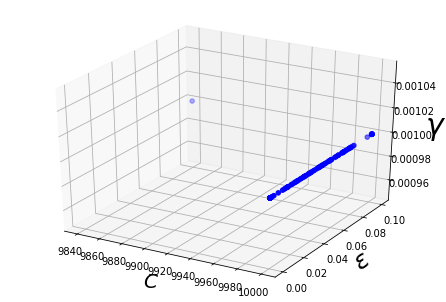






Mean Squared Error for the ARIMA Model:	 250179847.984915

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 78990810.288841

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79635251.794195

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79375611.402501

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79394571.762038

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 78980314.290209

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.03827475658401905,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



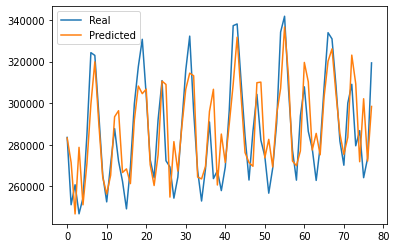


Ensemble Model series` predicitions:



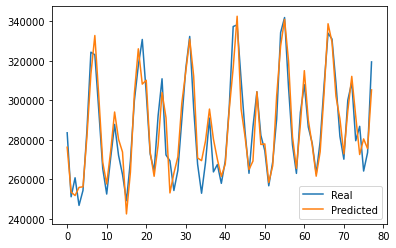


Ensemble Model best Average series` predicitions:



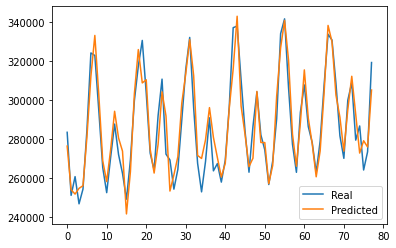


Ensemble Model K best Average series` predicitions:



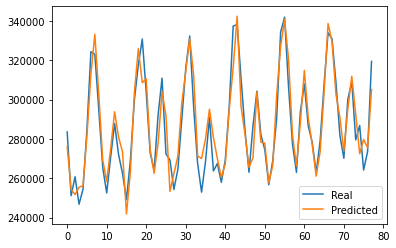


Ensemble Model best Median series` predicitions:



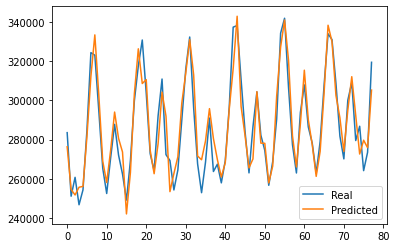


Ensemble Model K best Median series` predicitions:



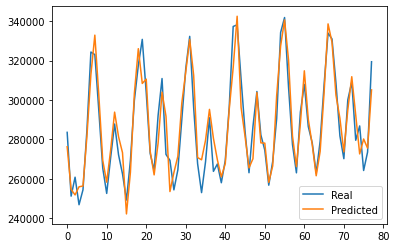






Best Result: Experiment # 5 . Mean Squared Error = 78990810.288841



In [28]:
pso(120, 100, 3, 1, 60, 5)